In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [171]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


cities_pd=pd.DataFrame({'cities': cities})
cities_pd["Cloudiness"] = ""
cities_pd["Country"]=""
cities_pd["Date"]=""
cities_pd["Humidity"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""
cities_pd.head()

,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,,,,,,,,
1,hilo,,,,,,,,
2,bluff,,,,,,,,
3,lanja,,,,,,,,
4,amderma,,,,,,,,


## Perform API Calls

In [170]:
api_key = api_keys.api_key
units = "imperial"
counter=0

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={api_key}&units={units}&q="
for index, row in cities_pd.iterrows():
    try:

        city = row['cities']
        response = requests.get(query_url + city).json()
        cities_pd.loc[index, "Lat"]=response['coord']['lat']
        cities_pd.loc[index, "Lng"]=response['coord']['lon']
        cities_pd.loc[index,"Humidity"]=response['main']['humidity']
        cities_pd.loc[index,"Max Temp"]=response['main']['temp_max']
        cities_pd.loc[index,"Cloudiness"]=response['clouds']['all']
        cities_pd.loc[index,"Wind Speed"]=response['wind']['speed']
        cities_pd.loc[index,"Country"]=response['sys']['country']
        cities_pd.loc[index,"Date"]=response['dt']
        counter=counter+1
        print(str(counter)+":"+city)
    except (KeyError, IndexError):
        cities_pd.set_value(index,'Lat',np.nan)
        cities_pd.set_value(index,'Lng',np.nan)
        cities_pd.set_value(index,'Max Temp',np.nan)
        cities_pd.set_value(index,'Humidity',np.nan)
        cities_pd.set_value(index,'Cloudiness',np.nan)
        cities_pd.set_value(index,'Wind Speed',np.nan)
        a="Missing field/result... skipping."



1:lebu
2:westport
3:husavik
4:mataura
5:punta arenas


In [134]:
len(cities_pd)

995

In [135]:
cities_pd_new=cities_pd.dropna()
print("there are "+str(len(cities_pd)-len(cities_pd_new))+" missing cities that will be dropped")
time.strftime('%m/%d/%Y %H:%M:%S',  time.gmtime(1532299860))
cities_pd_new['Date']=cities_pd_new['Date'].apply(lambda x : time.strftime('%m/%d/%Y %H:%M:%S',  time.gmtime(x)) )
cities_pd_new.head()

there are 103 missing cities that will be dropped


C:\Users\Nikitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,petropavlovsk-kamchatskiy,75,RU,07/22/2018 23:30:00,87,53.05,158.65,59,8.95
1,mlandizi,12,TZ,07/23/2018 00:12:44,81,-6.71,38.74,72.66,12.44
2,bluff,0,AU,07/23/2018 00:12:44,50,-23.58,149.07,63.03,4.72
3,mogadishu,92,SO,07/23/2018 00:08:23,99,2.04,45.34,76.62,22.17
4,rikitea,100,PF,07/23/2018 00:12:44,100,-23.12,-134.97,70.59,10.65


In [158]:
cities_pd_new['Lat'] = pd.to_numeric(cities_pd_new['Lat'])
cities_pd_new['Lng'] = pd.to_numeric(cities_pd_new['Lng'])
cities_pd_new['Max Temp'] = pd.to_numeric(cities_pd_new['Max Temp'])
cities_pd_new['Wind Speed'] = pd.to_numeric(cities_pd_new['Wind Speed'])
cities_pd_new['Cloudiness'] = pd.to_numeric(cities_pd_new['Cloudiness'])
cities_pd_new['Humidity'] = pd.to_numeric(cities_pd_new['Humidity'])
cities_pd_new.head()

C:\Users\Nikitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nikitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nikitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Latitude Bins
0,petropavlovsk-kamchatskiy,75,RU,07/22/2018 23:30:00,87,53.05,158.65,59.00,8.95,30 to 60
1,mlandizi,12,TZ,07/23/2018 00:12:44,81,-6.71,38.74,72.66,12.44,-30 to 30
2,bluff,0,AU,07/23/2018 00:12:44,50,-23.58,149.07,63.03,4.72,-30 to 30
3,mogadishu,92,SO,07/23/2018 00:08:23,99,2.04,45.34,76.62,22.17,0 to 30
4,rikitea,100,PF,07/23/2018 00:12:44,100,-23.12,-134.97,70.59,10.65,-30 to 30


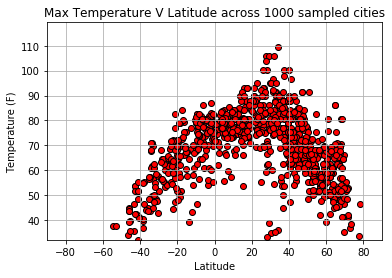

In [172]:
plt.xlim(-90,90)
plt.ylim(cities_pd_new['Max Temp'].min(),cities_pd_new['Max Temp'].max()+10)
plt.scatter( cities_pd_new['Lat'],cities_pd_new['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.title("Max Temperature V Latitude across 1000 sampled cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Images/MaxTempVsLat.png")

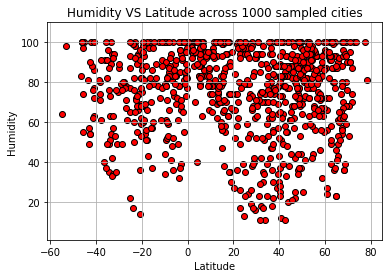

In [173]:
plt.ylim(cities_pd_new['Humidity'].min()-10,cities_pd_new['Humidity'].max()+10)
plt.scatter( cities_pd_new['Lat'],cities_pd_new['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity VS Latitude across 1000 sampled cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Images/HumidityVsLat.png")

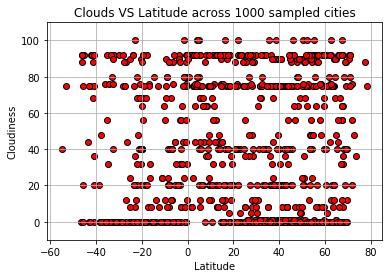

In [175]:
plt.ylim(cities_pd_new['Cloudiness'].min()-10,cities_pd_new['Cloudiness'].max()+10)
plt.scatter( cities_pd_new['Lat'],cities_pd_new['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.title("Clouds VS Latitude across 1000 sampled cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Images/CloudinessVsLat.png")

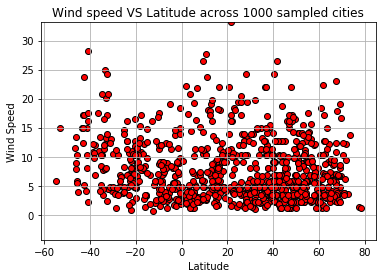

In [176]:
plt.ylim(cities_pd_new['Wind Speed'].min()-5,cities_pd_new['Wind Speed'].max())
plt.scatter( cities_pd_new['Lat'],cities_pd_new['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.title("Wind speed VS Latitude across 1000 sampled cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("../Images/WindSpeedVsLat.png")

In [164]:
bins = [-90,-60,-30,0,30,60 ,90]

# Create the names for the four bins
group_names = ["-90 to -60", "-60  to -30", "-30 to 30", "0 to 30", "30 to 60", "60 to 90"]

In [165]:
cities_pd_new["Latitude Bins"] = pd.cut(cities_pd_new["Lat"], bins, labels=group_names)
cities_pd_new.head()
cities_pd_new.groupby('Latitude Bins')['Wind Speed'].mean()



C:\Users\Nikitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Latitude Bins
-90 to -60           NaN
-60  to -30    11.553016
-30 to 30       7.423105
0 to 30         7.992361
30 to 60        7.152391
60 to 90        6.896634
Name: Wind Speed, dtype: float64

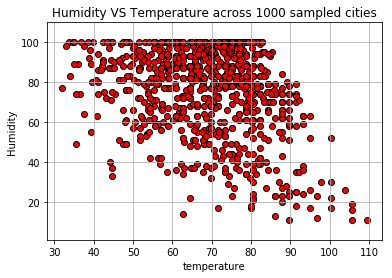

In [177]:
plt.ylim(cities_pd_new['Humidity'].min()-10,cities_pd_new['Humidity'].max()+10)
plt.scatter( cities_pd_new['Max Temp'],cities_pd_new['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity VS Temperature across 1000 sampled cities")
plt.ylabel("Humidity")
plt.xlabel("temperature")
plt.grid()
plt.savefig("../Images/HumidityVMaxTemp.png")

In [167]:
cities_pd_new.to_csv("cities.csv")